### Loading the image

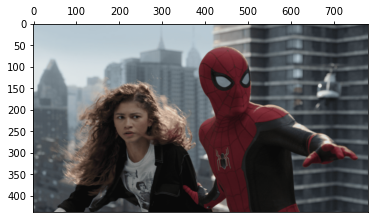

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv.imread('a1images/a1images/spider.png')

fig, ax = plt.subplots(1, 1, figsize=(6, 8))
ax.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax.xaxis.set_ticks_position('top')
plt.show()

### Splitting the image into H,S and V planes and applying the intensity transformation given

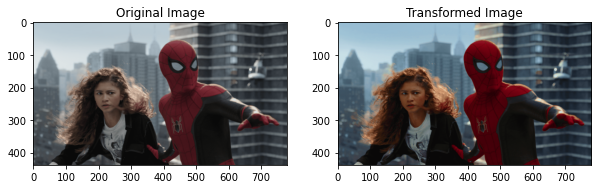

In [2]:
#Split the image into hue, saturation, and value planes.
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

h, s, v = cv.split(hsv_image)

# Define constants for the transformation
a = 0.75  # example value for scaling factor a
sigma = 70  

# Apply the transformation to the saturation plane
x = np.array(s, dtype=np.float32)
transformed_s = np.minimum(x + a * 128 * np.exp(-((x - 128) ** 2) / (2 * sigma ** 2)), 255)

# Convert back to uint8 type and merge the channels
transformed_s = transformed_s.astype(np.uint8)
hsv_transformed = cv.merge([h, transformed_s, v])

# Convert back to BGR color space
output_image = cv.cvtColor(hsv_transformed, cv.COLOR_HSV2BGR)

# Display the original and transformed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title('Transformed Image')
plt.imshow(cv.cvtColor(output_image, cv.COLOR_BGR2RGB))

plt.show()

### Adjusting a to get a pleasing output

ValueError: num must be 1 <= num <= 4, not 5

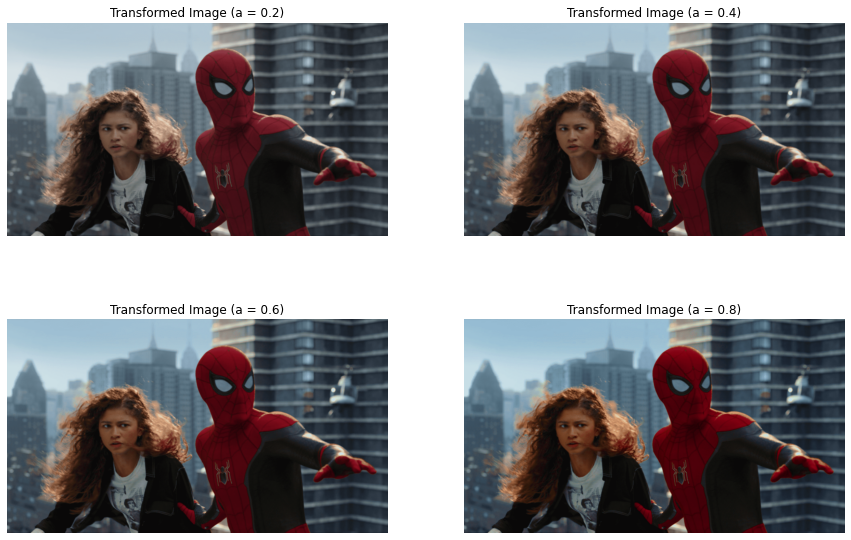

In [3]:
# List of 'a' values to test
a_values = [0.25, 0.5, 0.75, 1]

# Create a plot for multiple outputs
plt.figure(figsize=(15, 10))

for i, a in enumerate(a_values):
    # Apply the transformation to the saturation plane
    x = np.array(s, dtype=np.float32)
    transformed_s = np.minimum(x + a * 128 * np.exp(-((x - 128) ** 2) / (2 * sigma ** 2)), 255)

    # Convert back to uint8 and merge the channels
    transformed_s = transformed_s.astype(np.uint8)
    hsv_transformed = cv.merge([h, transformed_s, v])

    # Convert back to BGR color space
    output_image = cv.cvtColor(hsv_transformed, cv.COLOR_HSV2BGR)

    # Display the transformed image
    plt.subplot(2, 2, i + 1)
    plt.title(f'Transformed Image (a = {a})')
    plt.imshow(cv.cvtColor(output_image, cv.COLOR_BGR2RGB))
    plt.axis('off')

# Display the images
plt.tight_layout()
plt.show()